In [ ]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer  
from nltk.stem import PorterStemmer 
from wordcloud import WordCloud

In [13]:
df = pd.read_csv("Dataset/Reddit_Data.csv")
print(df.head())
print(f"Shape of the Dataset: {df.shape}")

                                       clean_comment  category
0   family mormon have never tried explain them t...         1
1  buddhism has very much lot compatible with chr...         1
2  seriously don say thing first all they won get...        -1
3  what you have learned yours and only yours wha...         0
4  for your own benefit you may want read living ...         1
Shape of the Dataset: (37249, 2)


In [4]:
print(df.keys())
print(df['category'].value_counts())



Index(['clean_comment', 'category'], dtype='object')
category
 1    15830
 0    13142
-1     8277
Name: count, dtype: int64


In [22]:
df['clean_comment'].astype(str)# Checking for null values in the DataFrame
print(df.isnull().sum())
df.dropna(subset=['clean_comment'], inplace=True)  # Dropping rows with null values in 'clean_comment'
print("After dropping null values:")
print(df.isnull().sum())

clean_comment    0
category         0
dtype: int64
After dropping null values:
clean_comment    0
category         0
dtype: int64


In [32]:
stop_words = set(nltk.corpus.stopwords.words('english'))

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    # Remove extra spaces
    text = ' '.join(text.split())
    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Remove numbers
    text = ''.join(char for char in text if not char.isdigit())
    # Remove URLs
    text = ' '.join(word for word in text.split() if not word.startswith('http'))
    # Remove mentions   
    text = ' '.join(word for word in text.split() if not word.startswith('@'))
    # Applying Stemming
    text = ' '.join(stemmer.stem(word) for word in text.split())
    # Applying Lemmatization
   
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())

    return text

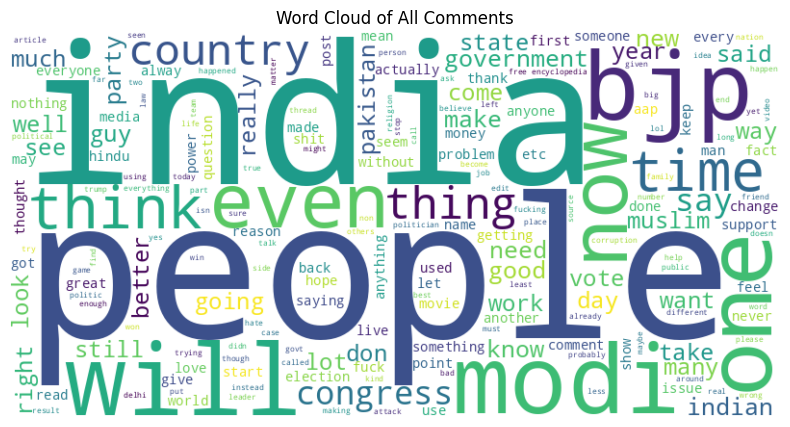

In [31]:
df['preprocessed_text'] = df['clean_comment'].apply(lambda x: preprocess_text(str(x)))
df.head()
# Visualizing the of wordcloud
def plot_wordcloud(text, title=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()
# Concatenate all comments into a single string for word cloud generation
all_comments = ' '.join(df['clean_comment'].astype(str))    
# Plotting the word cloud for all comments
plot_wordcloud(all_comments, title='Word Cloud of All Comments')
